In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
import calendar

# Part 1: Temporal Patterns



In [2]:
df = pd.read_csv('Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv')

In [3]:
df = df.drop(columns=['PdId','Descript','IncidntNum'])

In [4]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

In [5]:
df = df.where(df.Category.isin(focuscrimes))

In [6]:
df['Date'] = pd.to_datetime(df['Date'], format="%m/%d/%Y")

In [7]:
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Day'] = df['Date'].dt.day
df['WeekDay'] = df['Date'].dt.weekday
df['Time'] = pd.to_datetime(df['Time'], format="%H:%M")
df['Hour'] = df['Time'].dt.hour
df['Minute'] = df['Time'].dt.minute
df['Time'] = df['Time'].dt.time


In [8]:
prostitution = df[df['Category'] == 'PROSTITUTION']

In [9]:
drunkdriving = df[df['Category'] == 'DRIVING UNDER THE INFLUENCE']

In [20]:
wl = df[df['Category'] == 'WEAPON LAWS']

In [21]:
rob = df[df['Category'] == 'ROBBERY']

In [22]:
bur = df[df['Category'] == 'BURGLARY']

In [23]:
drug = df[df['Category'] == 'DRUG/NARCOTIC']

Text(0.5, 1.0, 'PROSTITUTION')

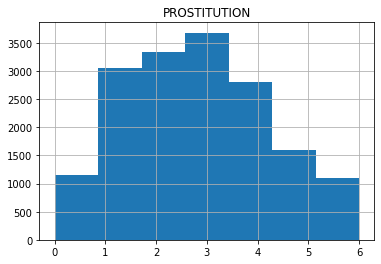

In [25]:
prostitution_plot = prostitution['WeekDay'].hist(bins=7)
prostitution_plot.set_title('PROSTITUTION')


Text(0.5, 1.0, 'DRIVING UNDER THE INFLUENCE')

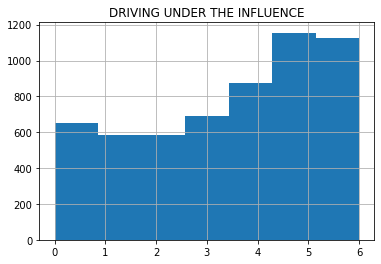

In [19]:
drunkdriving_plot = drunkdriving['WeekDay'].hist(bins=7)
drunkdriving_plot.set_title('DRIVING UNDER THE INFLUENCE')

Text(0.5, 1.0, 'BURGLARY')

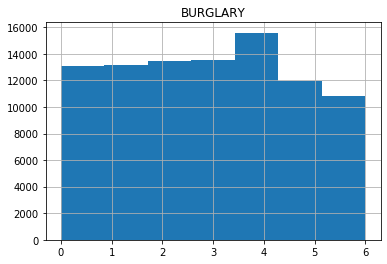

In [56]:

bur_plot = bur['WeekDay'].hist(bins=7)
bur_plot.set_title('BURGLARY')

In [55]:
#fig, ax=plt.subplots(nrows=2,ncols=3)
#fig.set_size_inches(20,5)
#fig.subplots_adjust(wspace=0.4)
#ax[0,0] = drunkdriving['WeekDay'].hist(bins=7)
#ax[0,0].text(0.5,0.5,str(('DRIVING UNDER THE INFLUENCE')),fontsize=14)
#ax[0,1] = wl['WeekDay'].hist(bins=7)
#ax[0,1].text(0.5,0.5,str(('WEAPON LAWS')),fontsize=14)


(array([1143., 3054., 3332., 3680., 2803., 1598., 1091.]),
 array([0.        , 0.85714286, 1.71428571, 2.57142857, 3.42857143,
        4.28571429, 5.14285714, 6.        ]),
 <a list of 7 Patch objects>)

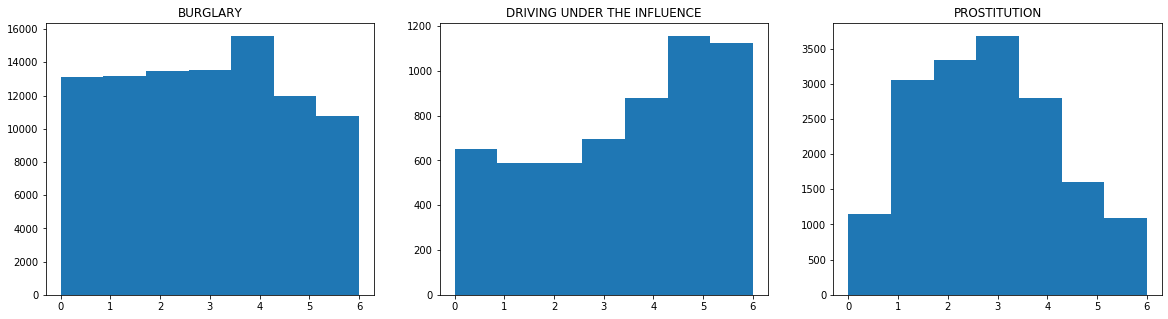

In [59]:
fig, ax=plt.subplots(nrows=1,ncols=3)
fig.set_size_inches(20,5)
plt.subplot(1,3,1)
plt.title('BURGLARY')
plt.hist(bur['WeekDay'],bins=7)
plt.subplot(1,3,2)
plt.title('DRIVING UNDER THE INFLUENCE')
plt.hist(drunkdriving['WeekDay'],bins=7)
plt.subplot(1,3,3)
plt.title('PROSTITUTION')
plt.hist(prostitution['WeekDay'],bins=7)


(array([1651., 1446., 1331., 1517., 1386., 1211., 1262., 1315., 1544.,
        1371., 1388., 1279.]),
 array([ 1.        ,  1.91666667,  2.83333333,  3.75      ,  4.66666667,
         5.58333333,  6.5       ,  7.41666667,  8.33333333,  9.25      ,
        10.16666667, 11.08333333, 12.        ]),
 <a list of 12 Patch objects>)

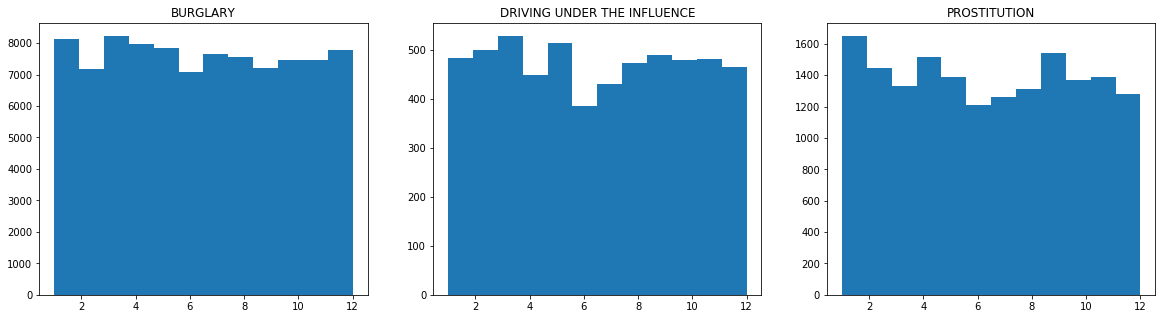

In [60]:
fig, ax=plt.subplots(nrows=1,ncols=3)
fig.set_size_inches(20,5)
plt.subplot(1,3,1)
plt.title('BURGLARY')
plt.hist(bur['Month'],bins=12)
plt.subplot(1,3,2)
plt.title('DRIVING UNDER THE INFLUENCE')
plt.hist(drunkdriving['Month'],bins=12)
plt.subplot(1,3,3)
plt.title('PROSTITUTION')
plt.hist(prostitution['Month'],bins=12)

In [111]:
bur1 = bur.groupby((bur['WeekDay']) * 24 + (bur['Hour'])).mean().rename_axis('HourOfWeek')
drunkdriving1 = drunkdriving.groupby((drunkdriving['WeekDay']) * 24 + (drunkdriving['Hour'])).mean().rename_axis('HourOfWeek')
prostitution1 = prostitution.groupby((prostitution['WeekDay']) * 24 + (prostitution['Hour'])).mean().rename_axis('HourOfWeek')

In [89]:
#fig, ax=plt.subplots(nrows=1,ncols=3)
#fig.set_size_inches(20,5)
#plt.subplot(1,3,1)
#plt.title('BURGLARY')
#plt.hist(bur1['HourOfWeek'],bins=168)
#plt.subplot(1,3,2)
#plt.title('DRIVING UNDER THE INFLUENCE')
#plt.hist(drunkdriving1['HourOfWeek'],bins=168)
#plt.subplot(1,3,3)
#plt.title('PROSTITUTION')
#plt.hist(prostitution1['HourOfWeek'],bins=168)